<a href="https://colab.research.google.com/github/ankita026/FDIP/blob/main/fdip_2_123b1f008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving cat.8.jpg to cat.8.jpg


(np.float64(-0.5), np.float64(460.5), np.float64(344.5), np.float64(-0.5))

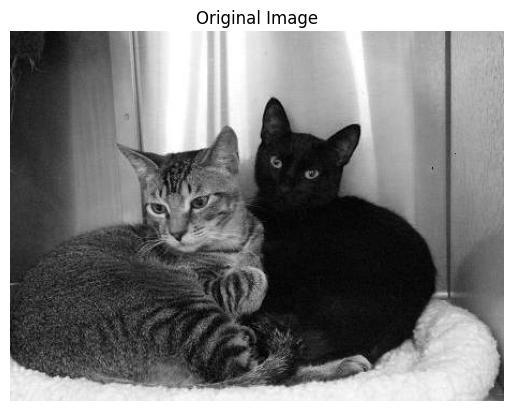

In [5]:
img = cv2.imread("cat.8.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")


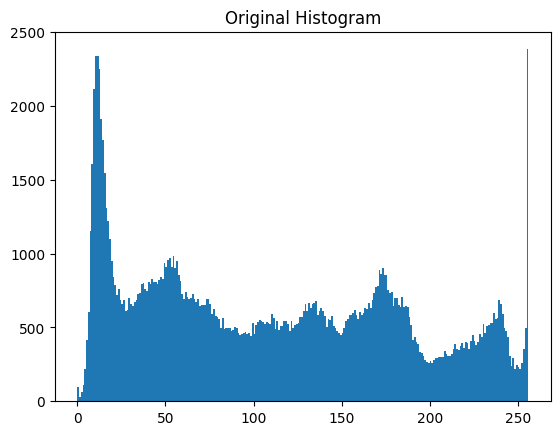

In [6]:
plt.hist(img.ravel(), bins=256, range=[0,256])
plt.title("Original Histogram")
plt.show()

(np.float64(-0.5), np.float64(460.5), np.float64(344.5), np.float64(-0.5))

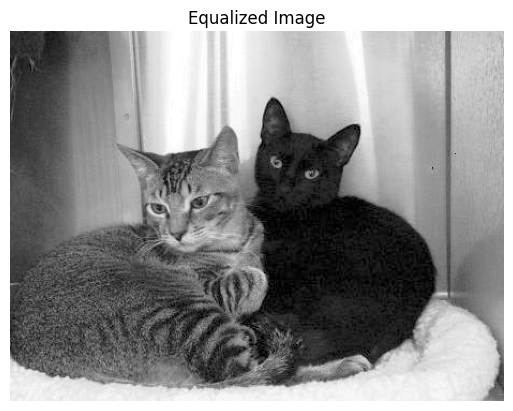

In [7]:

img_eq = cv2.equalizeHist(img)

plt.imshow(img_eq, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

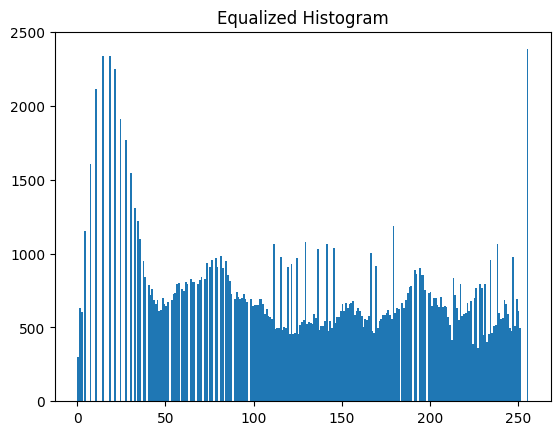

In [8]:
plt.hist(img_eq.ravel(), bins=256, range=[0,256])
plt.title("Equalized Histogram")
plt.show()

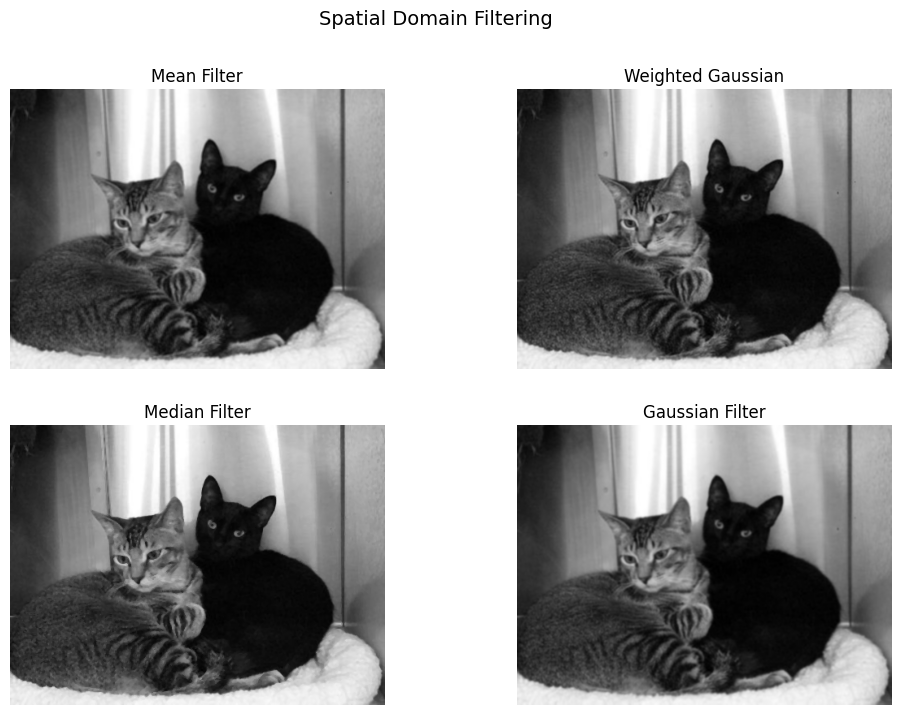

In [9]:
mean_filter     = cv2.blur(img, (3,3))
weighted_filter = cv2.GaussianBlur(img, (3,3), 0)
median_filter   = cv2.medianBlur(img, 3)
gaussian_filter = cv2.GaussianBlur(img, (5,5), 1.0)

plt.figure(figsize=(12,8))
titles  = ["Mean Filter", "Weighted Gaussian", "Median Filter", "Gaussian Filter"]
filters = [mean_filter, weighted_filter, median_filter, gaussian_filter]

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(filters[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.suptitle("Spatial Domain Filtering", fontsize=14)
plt.show()


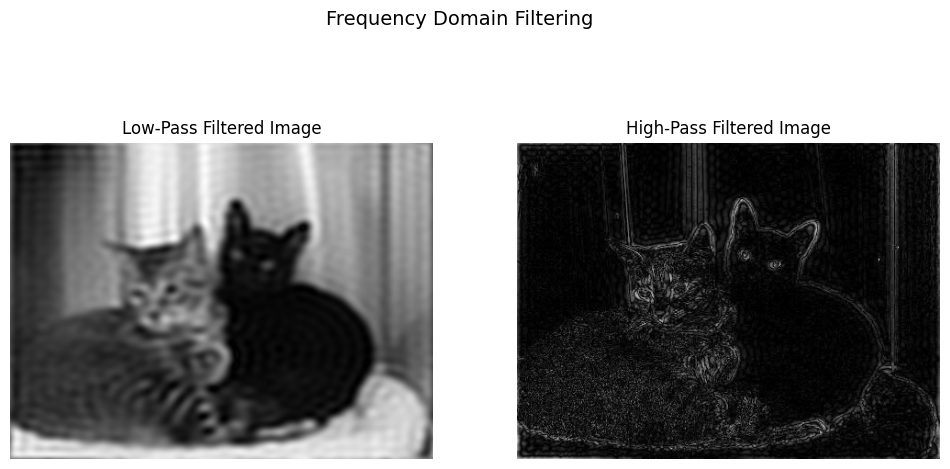

In [12]:
# Make sure img is loaded (grayscale)
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Low-pass filter mask
mask = np.zeros((rows, cols), np.uint8)
r = 30
cv2.circle(mask, (ccol, crow), r, 1, -1)
f_low = fshift * mask
img_low = np.fft.ifft2(np.fft.ifftshift(f_low))
img_low = np.abs(img_low)

# High-pass filter mask
mask2 = 1 - mask
f_high = fshift * mask2
img_high = np.fft.ifft2(np.fft.ifftshift(f_high))
img_high = np.abs(img_high)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_low, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_high, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis("off")

plt.suptitle("Frequency Domain Filtering", fontsize=14)
plt.show()

